### Import Libraries

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense

from sklearn.svm import SVR
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import Training Set

In [2]:
# Import Training Set

df = pd.read_csv("train.csv")
df[:5]

,time and date,air temperature,surface humidity,radiance intensity,surface incomming short wave flux,wind speed
0,08/01/2019 00:00,20.733210,0.015783,336.418793,2.65332,6.649365
1,08/01/2019 01:00,20.610926,0.015502,333.328033,107.12500,6.926465
2,08/01/2019 02:00,20.968317,0.015116,330.606750,320.00000,7.402035
3,08/01/2019 03:00,23.868128,0.012997,335.808411,545.50000,7.386476
4,08/01/2019 04:00,26.353357,0.010358,343.027130,747.00000,7.045732


In [3]:
# New column of datetime data type
df["Date Time"] = pd.to_datetime(df["time and date"])

In [4]:
del df["time and date"]
df.set_index("Date Time", inplace = True)
df[:5]

,air temperature,surface humidity,radiance intensity,surface incomming short wave flux,wind speed
Date Time,,,,,
2019-08-01 00:00:00,20.733210,0.015783,336.418793,2.65332,6.649365
2019-08-01 01:00:00,20.610926,0.015502,333.328033,107.12500,6.926465
2019-08-01 02:00:00,20.968317,0.015116,330.606750,320.00000,7.402035
2019-08-01 03:00:00,23.868128,0.012997,335.808411,545.50000,7.386476
2019-08-01 04:00:00,26.353357,0.010358,343.027130,747.00000,7.045732


In [7]:
df.describe()

,air temperature,surface humidity,radiance intensity,surface incomming short wave flux,wind speed
count,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000
mean,13.035236,0.005674,273.212928,286.186439,5.405726
std,9.320208,0.003454,47.142559,362.884471,2.230162
min,-8.823217,0.000641,162.980896,0.000000,0.680669
25%,5.087923,0.002968,239.905746,0.000000,3.718665
50%,13.189707,0.004842,275.007553,17.027344,5.224048
75%,20.660791,0.007491,307.775192,596.750000,6.844280
max,31.157282,0.017878,391.483673,1125.500000,16.384342


In [5]:
# Remove surface incoming short wave flux as it has high standard deviation
del df["surface incomming short wave flux"]

In [6]:
df[:5]

,air temperature,surface humidity,radiance intensity,wind speed
Date Time,,,,
2019-08-01 00:00:00,20.733210,0.015783,336.418793,6.649365
2019-08-01 01:00:00,20.610926,0.015502,333.328033,6.926465
2019-08-01 02:00:00,20.968317,0.015116,330.606750,7.402035
2019-08-01 03:00:00,23.868128,0.012997,335.808411,7.386476
2019-08-01 04:00:00,26.353357,0.010358,343.027130,7.045732


### Import Testing Set

In [7]:
# Import Testing Data

dt = pd.read_csv("test.csv")
dt[:5]

,time and date,air temperature,surface humidity,radiance intensity,surface incomming short wave flux,wind speed
0,18/08/2020 22:00,22.062860,0.010105,317.133606,0.000000,7.465313
1,18/08/2020 23:00,22.092310,0.009034,316.073578,0.000000,6.717577
2,19/08/2020 00:00,22.060419,0.008392,314.934540,0.030198,6.449039
3,19/08/2020 01:00,21.988306,0.007938,313.799072,77.437500,6.458337
4,19/08/2020 02:00,21.834223,0.007634,313.741882,295.750000,6.447921


In [8]:
# New column of datetime datatype
dt["Date Time"] = pd.to_datetime(dt["time and date"])

In [9]:
# remove time and date column
del dt["time and date"]

In [10]:
dt.describe()

,air temperature,surface humidity,radiance intensity,surface incomming short wave flux,wind speed
count,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000
mean,9.698843,0.003116,236.665886,234.543742,5.284949
std,8.148013,0.002787,43.023729,317.782019,2.217588
min,-9.843390,0.000498,149.974533,0.000000,0.930645
25%,3.564561,0.001503,205.317776,0.000000,3.711560
50%,8.819437,0.002300,232.785438,0.000000,4.966841
75%,15.961535,0.003496,260.826576,504.875000,6.530240
max,28.955896,0.017050,380.889893,1071.500000,15.319681


In [11]:
# Remove surface incomming short wave flux as it has high standard deviation
del dt["surface incomming short wave flux"]

In [12]:
dt.set_index("Date Time", inplace = True)
dt[:5]

,air temperature,surface humidity,radiance intensity,wind speed
Date Time,,,,
2020-08-18 22:00:00,22.062860,0.010105,317.133606,7.465313
2020-08-18 23:00:00,22.092310,0.009034,316.073578,6.717577
2020-08-19 00:00:00,22.060419,0.008392,314.934540,6.449039
2020-08-19 01:00:00,21.988306,0.007938,313.799072,6.458337
2020-08-19 02:00:00,21.834223,0.007634,313.741882,6.447921


# Data Analysis

**Distribution of Air Temperature**

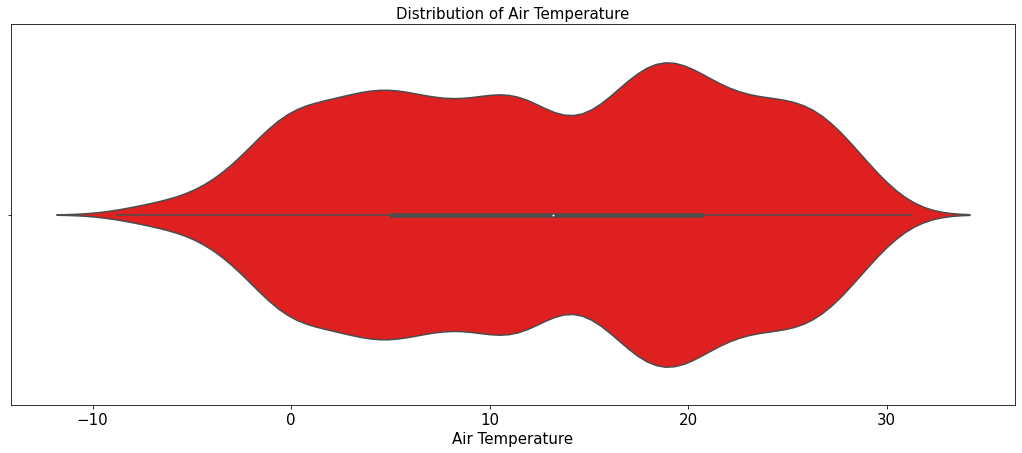

In [14]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "air temperature", data = df, color = "red")
plt.title("Distribution of Air Temperature", size = 15)
plt.xlabel("Air Temperature", size = 15)
plt.xticks(size = 15)
plt.savefig("Air_Temperature_Distribution.png")
plt.show()

**Distribution of Surface Humidity**

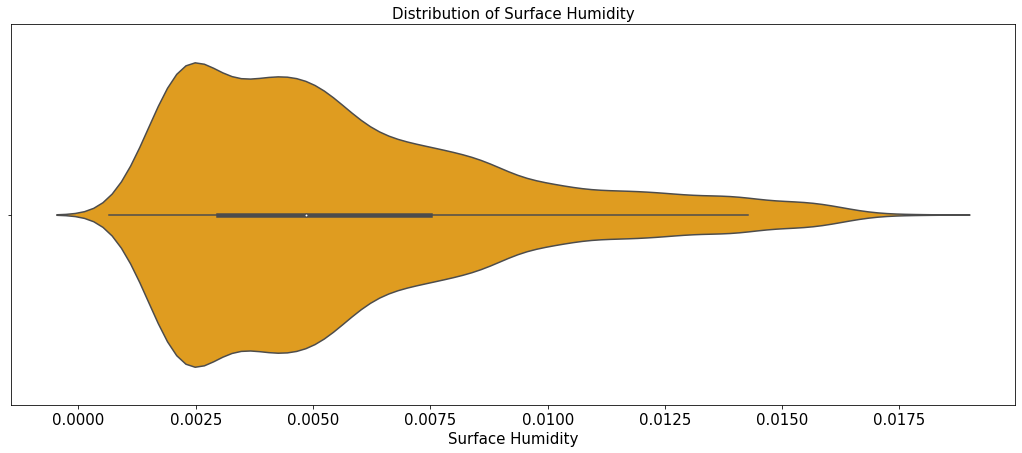

In [15]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "surface humidity", data = df, color = "orange")
plt.title("Distribution of Surface Humidity", size = 15)
plt.xlabel("Surface Humidity", size = 15)
plt.xticks(size = 15)
plt.savefig("Surface_Humidity_Distribution.png")
plt.show()

**Distribution of Radiance Intensity**

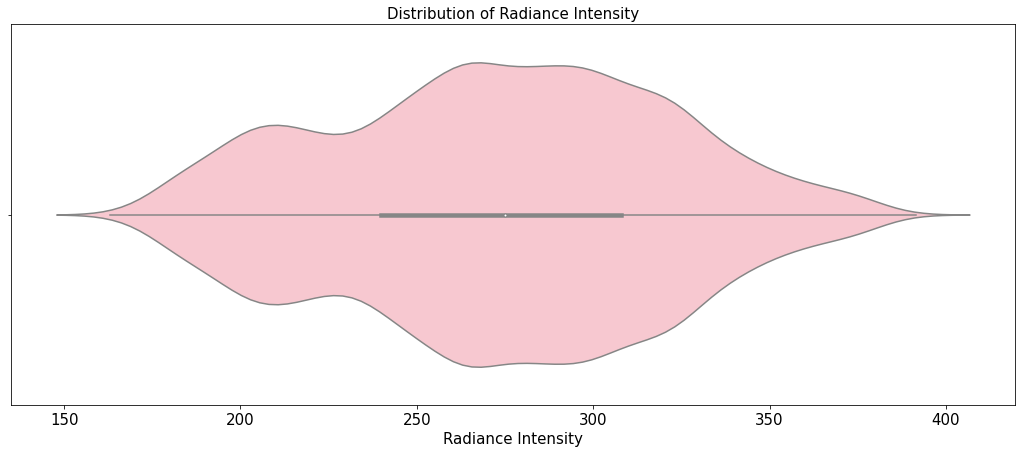

In [16]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "radiance intensity", data = df, color = "pink")
plt.title("Distribution of Radiance Intensity", size = 15)
plt.xlabel("Radiance Intensity", size = 15)
plt.xticks(size = 15)
plt.savefig("Radiance_Intensity.png")
plt.show()

**Distribution of Wind Speed**

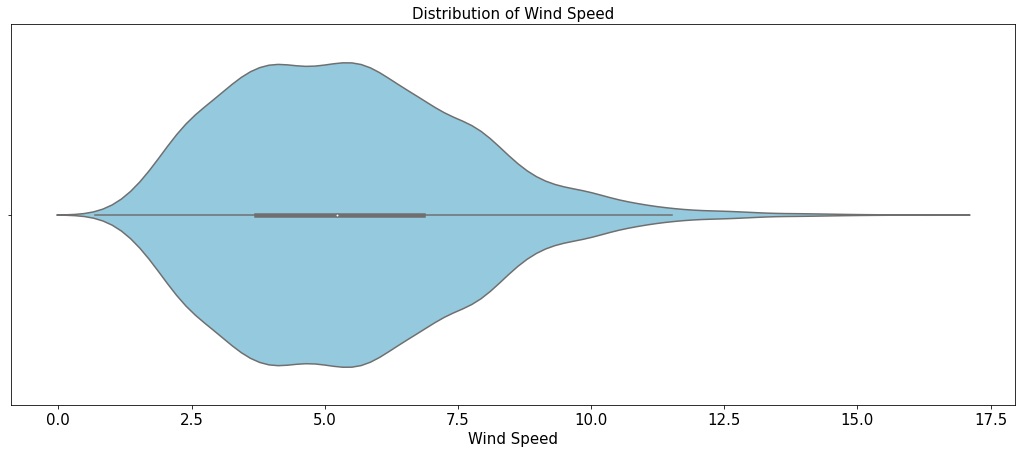

In [17]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "wind speed", data = df, color = "skyblue")
plt.title("Distribution of Wind Speed", size = 15)
plt.xlabel("Wind Speed", size = 15)
plt.xticks(size = 15)
plt.savefig("Wind_Speed_Distribution.png")
plt.show()

# Air Temperature Prediction with SVM

In [13]:
features = df[["surface humidity", "radiance intensity", "wind speed"]]

target = df["air temperature"]

In [14]:
test = dt[["surface humidity", "radiance intensity", "wind speed"]]

In [143]:
# Scaling Object
scaler = StandardScaler()

# Values are scaled in range 0 to 1
scaled_features = scaler.fit_transform(features)
scaled_test = scaler.transform(test)


# SVR object
svm = SVR()

# Define kernel parameters
parameters = {"kernel":["linear", "poly"]}

# Instantiate the GridSearchCV object and run the search
searcher_air_svm = GridSearchCV(svm, parameters)

searcher_air_svm.fit(scaled_features, target)

# Report the best parameter and the corresponding score
print("Best CV params", searcher_air_svm.best_params_, "\n")

Best CV params {'kernel': 'linear'} 



**Prediction**

In [144]:
pred_s1 = searcher_air_svm.predict(scaled_test)
air_temp_svm = pd.DataFrame({"Actual": dt["air temperature"],
                             "Predicted": pred_s1})
air_temp_svm[:5]

,Actual,Predicted
Date Time,,
2020-08-18 22:00:00,22.062860,18.947382
2020-08-18 23:00:00,22.092310,20.138047
2020-08-19 00:00:00,22.060419,20.713719
2020-08-19 01:00:00,21.988306,21.021932
2020-08-19 02:00:00,21.834223,21.399746


**Custom Prediction**

In [145]:
searcher_air_svm.predict(scaler.transform([[0.010105, 316.073578, 6.449039]]))

array([18.78613416])

In [146]:
air_temp_svm.loc["2020-08-19 02:00:00"]

,Actual,Predicted
Date Time,,
2020-08-19 02:00:00,21.834223,21.399746


**Excel file of actual vs predicted values**

In [171]:
air_temp_svm["Error"] = abs(air_temp_svm["Actual"] - air_temp_svm["Predicted"])
air_temp_svm[:3]

,Actual,Predicted,Error
Date Time,,,
2020-08-18 22:00:00,22.062860,18.947382,3.115479
2020-08-18 23:00:00,22.092310,20.138047,1.954263
2020-08-19 00:00:00,22.060419,20.713719,1.346700


In [172]:
air_temp_svm.to_csv("Air_Temperature_SVM.csv")

**R Squared (Air Temperature SVM)**

In [25]:
r_squared = r2_score(dt["air temperature"], pred_s1)
print("R-Squared of Air Temperature Prediction by SVM =", r_squared.round(2))

R-Squared of Air Temperature Prediction by SVM = 0.73


**Mean Bias Error (Air Temperature SVM)**

In [26]:
MBE = np.mean(dt["air temperature"] - pred_s1)
print("Mean Bias Error Air Temperature Prediction by SVM =", MBE.round(2))

Mean Bias Error Air Temperature Prediction by SVM = 0.99


**Mean Abolute Error (Air Temperature SVM)**

In [27]:
MAE = mean_absolute_error(dt["air temperature"], pred_s1)
print("Mean Absolute Error Air Temperature Prediction by SVM =", MAE.round(2))

Mean Absolute Error Air Temperature Prediction by SVM = 3.31


**Root Mean Squared Error (Air Temperature SVM)**

In [28]:
score = MSE(dt["air temperature"], pred_s1)**0.5
print("Root Mean Squared Error of Air Temperature Prediction SVM =", score.round(2))

Root Mean Squared Error of Air Temperature Prediction SVM = 4.2


**Mean Absolute Percentage Error (Air Temperature SVM)**

In [29]:
mape = mean_absolute_percentage_error(dt["air temperature"], pred_s1)
print("Mean Absolute Percentage Error of Air Temperature Prediction SVM = ",mape.round(2))

Mean Absolute Percentage Error of Air Temperature Prediction SVM =  1.8


**Mean Absolute Bias Error (Air Temperature SVM)**

In [30]:
mabe = np.mean(abs(dt["air temperature"] - pred_s1))
print("Mean Absolute Bias Error of Air Temperature Prediction SVM = ", mabe.round(2))

Mean Absolute Bias Error of Air Temperature Prediction SVM =  3.31


**Air Temperature Actual and Predicted Values (SVM)**

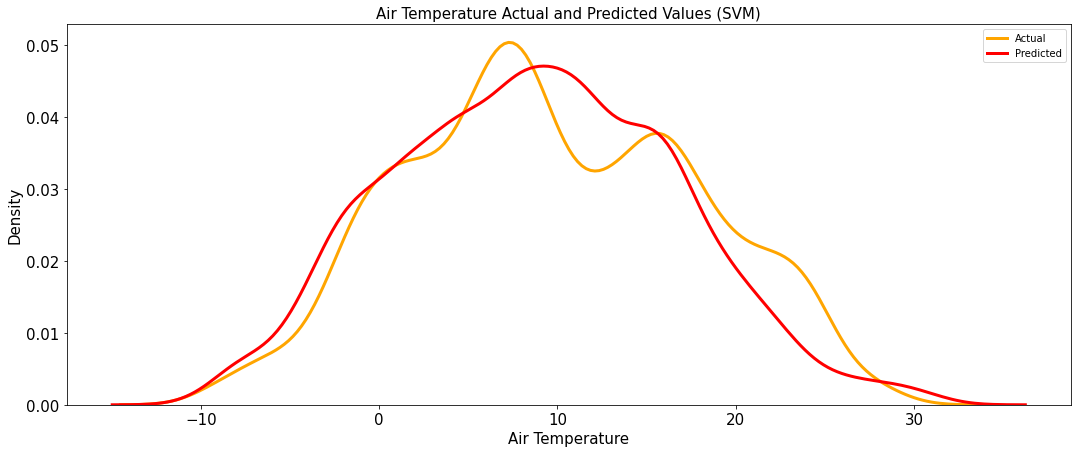

In [31]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = dt["air temperature"], label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_s1, label = "Predicted", linewidth = 3, color = "red")
plt.title("Air Temperature Actual and Predicted Values (SVM)", size = 15)
plt.xlabel("Air Temperature", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.savefig("Air_Temp_Actual_Predict_SVM.png")
plt.show()

**Air Temperature Actual and Predicted Values (SVM) by Dates**

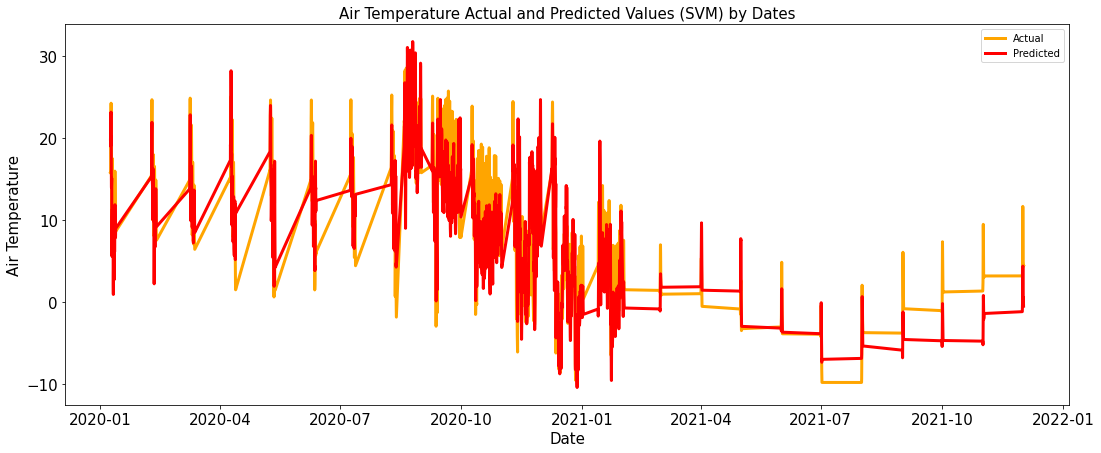

In [32]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = air_temp_svm.index, y = air_temp_svm["Actual"], label = "Actual", linewidth = 3, color = "orange")
sns.lineplot(x = air_temp_svm.index, y = air_temp_svm["Predicted"], label = "Predicted", linewidth = 3, color = "red")
plt.title("Air Temperature Actual and Predicted Values (SVM) by Dates", size = 15)
plt.xlabel("Date", size = 15)
plt.ylabel("Air Temperature", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.savefig("Air_Temp_Actual_Predict_Date_SVM.png")
plt.show()

# Air Temperature Prediction with ANN

In [15]:
features = df[["surface humidity", "radiance intensity", "wind speed"]]

target = df["air temperature"]

In [16]:
test = dt[["surface humidity", "radiance intensity", "wind speed"]]

In [17]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

scaled_test = scaler.transform(test)

# Initialising the ANN
model_air = Sequential()

# Adding the input layer and the first hidden layer
model_air.add(Dense(32, activation = 'relu', input_dim = 3))

# Adding the second hidden layer
model_air.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model_air.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model_air.add(Dense(units = 1))

model_air.compile(optimizer = 'adam',loss = 'mean_squared_error')

model_air.fit(scaled_features, target, batch_size = 10, epochs = 100)

pred_a1 = model_air.predict(scaled_test)
air_temp_ann = pd.DataFrame({"Actual": dt["air temperature"],
                             "Predicted": pred_a1.flatten()})
air_temp_ann[:5]

Epoch 1/100
922/922 [==============================] - 1s 1ms/step - loss: 43.5269
Epoch 2/100
922/922 [==============================] - 1s 1ms/step - loss: 20.7381
Epoch 3/100
922/922 [==============================] - 1s 1ms/step - loss: 20.1404
Epoch 4/100
922/922 [==============================] - 1s 1ms/step - loss: 19.7284
Epoch 5/100
922/922 [==============================] - 1s 1ms/step - loss: 19.3678
Epoch 6/100
922/922 [==============================] - 1s 1ms/step - loss: 19.2145
Epoch 7/100
922/922 [==============================] - 1s 1ms/step - loss: 19.0792
Epoch 8/100
922/922 [==============================] - 1s 1ms/step - loss: 18.9460
Epoch 9/100
922/922 [==============================] - 1s 1ms/step - loss: 18.8914
Epoch 10/100
922/922 [==============================] - 1s 1ms/step - loss: 18.7807
Epoch 11/100
922/922 [==============================] - 1s 1ms/step - loss: 18.7378
Epoch 12/100
922/922 [==============================] - 1s 1ms/step - loss: 18.6920
E

922/922 [==============================] - 1s 1ms/step - loss: 17.3241
Epoch 99/100
922/922 [==============================] - 1s 1ms/step - loss: 17.2311
Epoch 100/100
922/922 [==============================] - 1s 1ms/step - loss: 17.2308


,Actual,Predicted
Date Time,,
2020-08-18 22:00:00,22.062860,20.216774
2020-08-18 23:00:00,22.092310,18.893072
2020-08-19 00:00:00,22.060419,17.379421
2020-08-19 01:00:00,21.988306,16.535423
2020-08-19 02:00:00,21.834223,16.893248


In [18]:
model_air.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,273
Trainable params: 2,273
Non-trainable params: 0
_________________________________________________________________


**Custom Prediction**

In [150]:
model_air.predict(scaler.transform([[0.002372, 231.799377, 6.584265]]))

array([[6.535728]], dtype=float32)

In [151]:
air_temp_ann.loc["2020-12-29 04:00:00"]

,Actual,Predicted
Date Time,,
2020-12-29 04:00:00,-3.621283,-2.498964


In [174]:
air_temp_ann["Error"] = abs(air_temp_ann["Actual"] - air_temp_ann["Predicted"])
air_temp_ann[:3]

,Actual,Predicted,Error
Date Time,,,
2020-08-18 22:00:00,22.062860,20.539854,1.523006
2020-08-18 23:00:00,22.092310,19.352304,2.740006
2020-08-19 00:00:00,22.060419,17.689537,4.370882


In [175]:
air_temp_ann.to_csv("Air_Temperature_ANN.csv")

**R Squared (Air Temperature ANN)**

In [37]:
r_squared = r2_score(dt["air temperature"], pred_a1)
print("R Squared (Air Temperature ANN) =", r_squared.round(2))

R Squared (Air Temperature ANN) = 0.81


**Mean Bias Error (Air Temperature ANN)**

In [38]:
MBE = np.mean(dt["air temperature"] - pred_a1.flatten())
print("Mean Bias Error Air Temperature Prediction by ANN =", MBE.round(2))

Mean Bias Error Air Temperature Prediction by ANN = 0.22


**Mean Abolute Error (Air Temperature ANN)**

In [39]:
MAE = mean_absolute_error(dt["air temperature"], pred_a1)
print("Mean Absolute Error Air Temperature Prediction by ANN =", MAE.round(2))

Mean Absolute Error Air Temperature Prediction by ANN = 2.64


**Root Mean Squared Error (Air Temperature ANN)**

In [40]:
score = MSE(dt["air temperature"], pred_a1)**0.5
print("Root Mean Squared Error of Air Temperature Prediction ANN =", score.round(2))

Root Mean Squared Error of Air Temperature Prediction ANN = 3.55


**Mean Absolute Percentage Error (Air Temperature ANN)**

In [41]:
mape = mean_absolute_percentage_error(dt["air temperature"], pred_a1)
print("Mean Absolute Percentage Error of Air Temperature Prediction ANN = ",mape.round(2))

Mean Absolute Percentage Error of Air Temperature Prediction ANN =  1.56


**Mean Absolute Bias Error (Air Temperature ANN)**

In [42]:
mabe = np.mean(abs(dt["air temperature"] - pred_a1.flatten()))
print("Mean Absolute Bias Error of Air Temperature Prediction ANN = ", mabe.round(2))

Mean Absolute Bias Error of Air Temperature Prediction ANN =  2.64


**Air Temperature Actual and Predicted Values (ANN)**

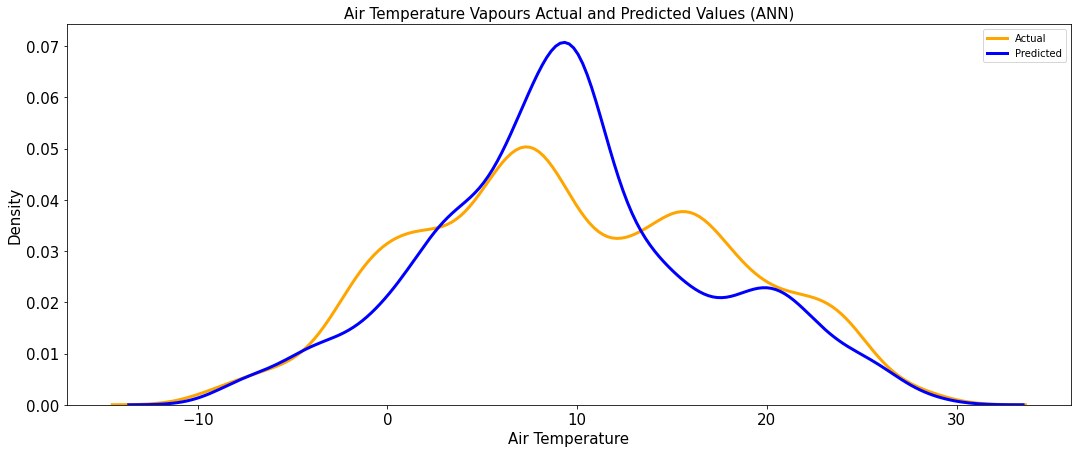

In [43]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = dt["air temperature"], label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a1.flatten(), label = "Predicted", linewidth = 3, color = "blue")
plt.title("Air Temperature Vapours Actual and Predicted Values (ANN)", size = 15)
plt.xlabel("Air Temperature", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.savefig("Air_Temp_Actual_Predict_ANN.png")
plt.show()

**Air Temperature Actual and Predicted Values (ANN) by Dates**

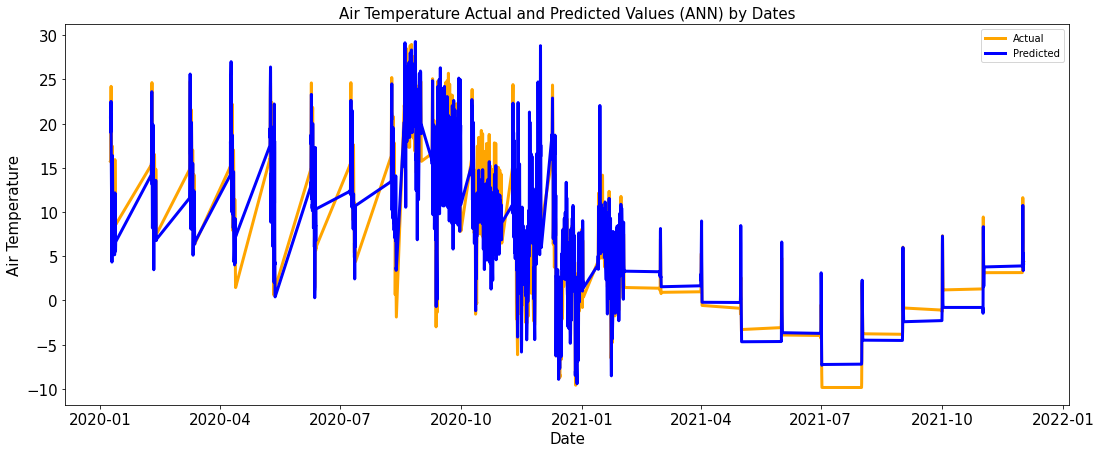

In [44]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = air_temp_ann.index, y = air_temp_ann["Actual"], label = "Actual", linewidth = 3, color = "orange")
sns.lineplot(x = air_temp_ann.index, y = air_temp_ann["Predicted"], label = "Predicted", linewidth = 3, color = "blue")
plt.title("Air Temperature Actual and Predicted Values (ANN) by Dates", size = 15)
plt.xlabel("Date", size = 15)
plt.ylabel("Air Temperature", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.savefig("Air_Temp_Actual_Predict_Date_ANN.png")
plt.show()

**Air Temperature Prediction Comparison (SVM & ANN)**

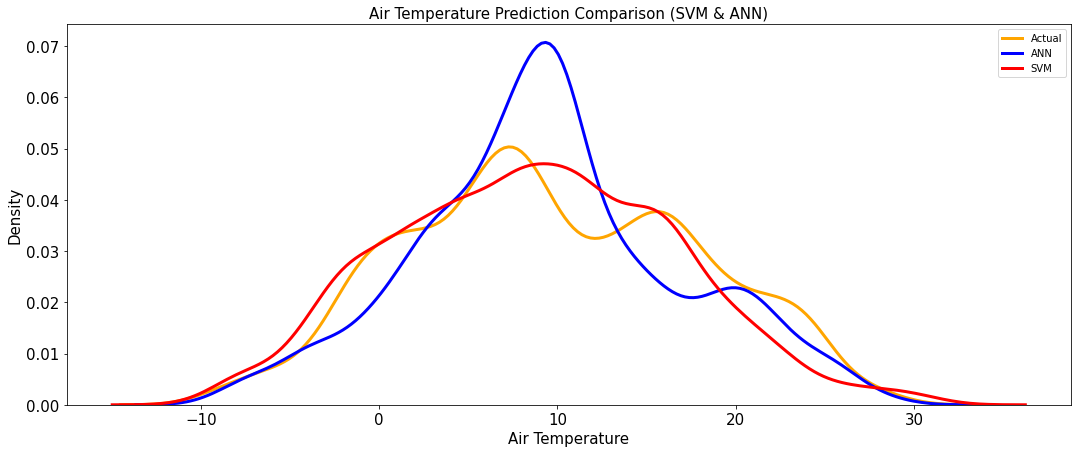

In [45]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = dt["air temperature"], label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a1.flatten(), label = "ANN", linewidth = 3, color = "blue")
sns.kdeplot(pred_s1.flatten(), label = "SVM", linewidth = 3, color = "red")
plt.title("Air Temperature Prediction Comparison (SVM & ANN)", size = 15)
plt.xlabel("Air Temperature", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.savefig("Air_Temp_Actual_Predict_Date_ANN_SVM.png")
plt.show()

**Air Temperature Prediction Comparison (SVM & ANN) by Date**

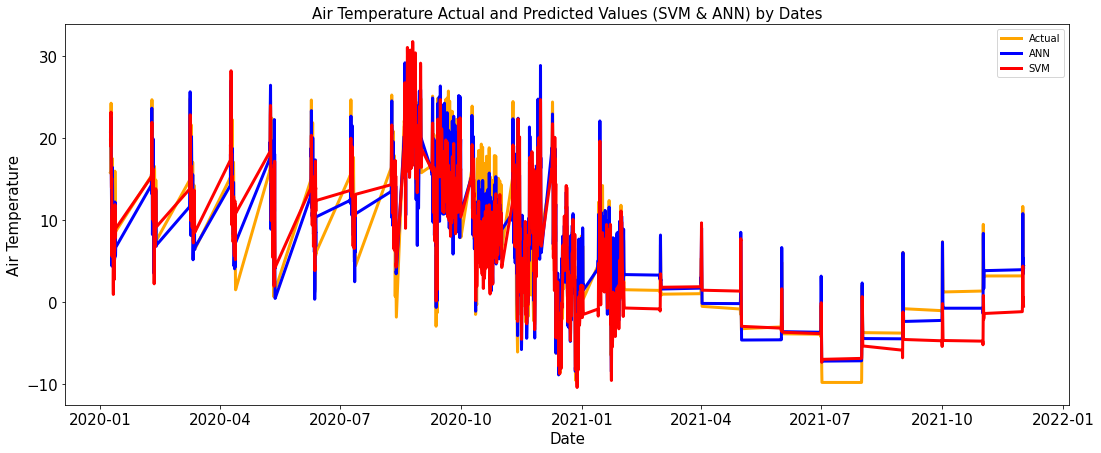

In [46]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = air_temp_ann.index, y = air_temp_ann["Actual"], label = "Actual", linewidth = 3, color = "orange")
sns.lineplot(x = air_temp_ann.index, y = air_temp_ann["Predicted"], label = "ANN", linewidth = 3, color = "blue")
sns.lineplot(x = air_temp_ann.index, y = air_temp_svm["Predicted"], label = "SVM", linewidth = 3, color = "red")
plt.title("Air Temperature Actual and Predicted Values (SVM & ANN) by Dates", size = 15)
plt.xlabel("Date", size = 15)
plt.ylabel("Air Temperature", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.savefig("Air_Temp_Actual_Predict_Date_ANN_SVM_Date.png")
plt.show()

# Surface Humidity Prediction with SVM

In [152]:
features = df[["air temperature", "radiance intensity", "wind speed"]]

target = df["surface humidity"]

In [153]:
test = dt[["air temperature", "radiance intensity", "wind speed"]]

In [154]:
# Scaling Object
scaler = StandardScaler()

# Values are scaled in range 0 to 1
scaled_features = scaler.fit_transform(features)
scaled_test = scaler.transform(test)


# SVR object
svm = SVR()

# Define kernel parameters
parameters = {"kernel":["linear", "poly"]}

# Instantiate the GridSearchCV object and run the search
searcher_surf = GridSearchCV(svm, parameters)

searcher_surf.fit(scaled_features, target)

# Report the best parameter and the corresponding score
print("Best CV params", searcher_surf.best_params_, "\n")

Best CV params {'kernel': 'linear'} 



In [155]:
pred_s2 = searcher_surf.predict(scaled_test)
surf_humd_svm = pd.DataFrame({"Actual": dt["surface humidity"],
                             "Predicted": pred_s2})
surf_humd_svm[:5]

,Actual,Predicted
Date Time,,
2020-08-18 22:00:00,0.010105,0.00926
2020-08-18 23:00:00,0.009034,0.00926
2020-08-19 00:00:00,0.008392,0.00926
2020-08-19 01:00:00,0.007938,0.00926
2020-08-19 02:00:00,0.007634,0.00926


**Custom Prediction**

In [158]:
searcher_surf.predict(scaler.transform([[18.833643, 310.775085, 6.117187]]))

array([0.00925971])

In [160]:
surf_humd_svm.loc["2021-01-25 12:00:00"]

,Actual,Predicted
Date Time,,
2021-01-25 12:00:00,0.000804,0.00926


**Excel file of actual vs predicted values**

In [177]:
surf_humd_svm["Error"] = abs(surf_humd_svm["Actual"] - surf_humd_svm["Predicted"])
surf_humd_svm[:3]

,Actual,Predicted,Error
Date Time,,,
2020-08-18 22:00:00,0.010105,0.00926,0.000845
2020-08-18 23:00:00,0.009034,0.00926,0.000226
2020-08-19 00:00:00,0.008392,0.00926,0.000868


In [178]:
surf_humd_svm.to_csv("Surface_Humidity_SVM.csv")

**R Squared (Surface Humidity SVM)**

In [52]:
r_squared = r2_score(dt["surface humidity"], pred_s2)
print("R Squared (Surface Humidity SVM) =", r_squared.round(2))

R Squared (Surface Humidity SVM) = -4.86


**Mean Bias Error (Surface Humidity SVM)**

In [53]:
MBE = np.mean(dt["surface humidity"] - pred_s2)
print("Mean Bias Error Surface Humidity SVM =", MBE.round(2))

Mean Bias Error Surface Humidity SVM = -0.01


**Mean Abolute Error (Surface Humidity SVM)**

In [54]:
MAE = mean_absolute_error(dt["surface humidity"], pred_s2)
print("Mean Abolute Error (Surface Humidity SVM) =", MAE.round(2))

Mean Abolute Error (Surface Humidity SVM) = 0.01


**Root Mean Squared Error (Surface Humidity SVM)**

In [55]:
score = MSE(dt["surface humidity"], pred_s2)**0.5
print("Root Mean Squared Error (Surface Humidity SVM) =", score.round(2))

Root Mean Squared Error (Surface Humidity SVM) = 0.01


**Mean Absolute Percentage Error (Surface Humidity SVM)**

In [56]:
mape = mean_absolute_percentage_error(dt["surface humidity"], pred_s2)
print("Mean Absolute Percentage Error (Surface Humidity SVM) = ", mape.round(2))

Mean Absolute Percentage Error (Surface Humidity SVM) =  3.64


**Mean Absolute Bias Error (Surface Humidity SVM)**

In [57]:
mabe = np.mean(abs(dt["surface humidity"] - pred_s2.flatten()))
print("Mean Absolute Bias Error (Surface Humidity SVM) = ", mabe.round(2))

Mean Absolute Bias Error (Surface Humidity SVM) =  0.01


# Surface Humidity Prediction with ANN

In [180]:
features = df[["air temperature", "radiance intensity", "wind speed"]]

target = df["surface humidity"]

In [181]:
test = dt[["air temperature", "radiance intensity", "wind speed"]]

In [182]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

scaled_test = scaler.transform(test)

# Initialising the ANN
model_surf = Sequential()

# Adding the input layer and the first hidden layer
model_surf.add(Dense(32, activation = 'relu', input_dim = 3))

# Adding the second hidden layer
model_surf.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model_surf.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model_surf.add(Dense(units = 1))

model_surf.compile(optimizer = 'adam',loss = 'mean_squared_error')

model_surf.fit(scaled_features, target, batch_size = 10, epochs = 100)

pred_a2 = model_surf.predict(scaled_test)
surf_humd_ann = pd.DataFrame({"Actual": dt["surface humidity"],
                             "Predicted": pred_a2.flatten()})
surf_humd_ann[:5]

Epoch 1/100
922/922 [==============================] - 1s 1ms/step - loss: 7.0549e-04
Epoch 2/100
922/922 [==============================] - 1s 1ms/step - loss: 1.9528e-05
Epoch 3/100
922/922 [==============================] - 1s 1ms/step - loss: 1.9172e-05
Epoch 4/100
922/922 [==============================] - 1s 1ms/step - loss: 1.9999e-05
Epoch 5/100
922/922 [==============================] - 1s 1ms/step - loss: 1.8963e-05
Epoch 6/100
922/922 [==============================] - 1s 1ms/step - loss: 1.2919e-05
Epoch 7/100
922/922 [==============================] - 1s 1ms/step - loss: 1.0881e-05
Epoch 8/100
922/922 [==============================] - 1s 1ms/step - loss: 8.2970e-06
Epoch 9/100
922/922 [==============================] - 1s 1ms/step - loss: 5.9285e-06A: 1s 
Epoch 10/100
922/922 [==============================] - 1s 1ms/step - loss: 5.7373e-06
Epoch 11/100
922/922 [==============================] - 1s 1ms/step - loss: 4.3660e-06
Epoch 12/100
922/922 [========================

,Actual,Predicted
Date Time,,
2020-08-18 22:00:00,0.010105,0.008430
2020-08-18 23:00:00,0.009034,0.008316
2020-08-19 00:00:00,0.008392,0.008166
2020-08-19 01:00:00,0.007938,0.007991
2020-08-19 02:00:00,0.007634,0.008079


In [164]:
dt[60:65]

,air temperature,surface humidity,radiance intensity,wind speed
Date Time,,,,
2020-08-21 10:00:00,26.440149,0.011262,367.838348,2.686316
2020-08-21 11:00:00,26.901148,0.011353,360.987823,2.858337
2020-08-21 12:00:00,27.045404,0.011501,358.080719,4.362207
2020-08-21 13:00:00,26.714319,0.012055,354.171814,6.587739
2020-08-21 14:00:00,25.171839,0.013272,349.784485,7.510524


In [183]:
model_surf.predict(scaler.transform([[25.171839, 358.080719, 2.686316]]))

array([[0.00948047]], dtype=float32)

In [184]:
surf_humd_ann.loc["2020-11-12 05:00:00"]

,Actual,Predicted
Date Time,,
2020-11-12 05:00:00,0.003679,0.004066


In [185]:
surf_humd_ann["Error"] = abs(surf_humd_ann["Actual"] - surf_humd_ann["Predicted"])
surf_humd_ann[:3]

,Actual,Predicted,Error
Date Time,,,
2020-08-18 22:00:00,0.010105,0.008430,0.001675
2020-08-18 23:00:00,0.009034,0.008316,0.000718
2020-08-19 00:00:00,0.008392,0.008166,0.000225


In [186]:
surf_humd_ann.to_csv("Surface_Humidity_ANN.csv")

**R Squared (Surface Humidity ANN)**

In [62]:
r_squared = r2_score(dt["surface humidity"], pred_a2)
print("R Squared (Surface Humidity ANN) =", r_squared)

R Squared (Surface Humidity ANN) = 0.8917120762297299


**Mean Bias Error (Surface Humidity ANN)**

In [63]:
MBE = np.mean(dt["surface humidity"] - pred_a2.flatten())
print("Mean Bias Error Surface Humidity SVM =", MBE)

Mean Bias Error Surface Humidity SVM = 8.866875063806462e-05


**Mean Abolute Error (Surface Humidity ANN)**

In [64]:
MAE = mean_absolute_error(dt["surface humidity"], pred_a2)
print("Mean Abolute Error (Surface Humidity ANN) =", MAE)

Mean Abolute Error (Surface Humidity ANN) = 0.0005789065613835215


**Root Mean Squared Error (Surface Humidity ANN)**

In [65]:
score = MSE(dt["surface humidity"], pred_a2)**0.5
print("Root Mean Squared Error (Surface Humidity ANN) =", score)

Root Mean Squared Error (Surface Humidity ANN) = 0.0009169918346536507


**Mean Absolute Percentage Error (Surface Humidity ANN)**

In [66]:
mape = mean_absolute_percentage_error(dt["surface humidity"], pred_a2)
print("Mean Absolute Percentage Error (Surface Humidity ANN) = ", mape)

Mean Absolute Percentage Error (Surface Humidity ANN) =  0.2072200097631665


**Mean Absolute Bias Error (Surface Humidity ANN)**

In [67]:
mabe = np.mean(abs(dt["surface humidity"] - pred_a2.flatten()))
print("Mean Absolute Bias Error (Surface Humidity SVM) = ", mabe)

Mean Absolute Bias Error (Surface Humidity SVM) =  0.0005789065613835215


# Wind Speed Prediction with SVM

In [187]:
features = df[["air temperature", "radiance intensity", "surface humidity"]]

target = df["wind speed"]

In [188]:
test = dt[["air temperature", "radiance intensity", "surface humidity"]]

In [190]:
# Scaling Object
scaler = StandardScaler()

# Values are scaled in range 0 to 1
scaled_features = scaler.fit_transform(features)
scaled_test = scaler.transform(test)


# SVR object
svm = SVR()

# Define kernel parameters
parameters = {"kernel":["linear", "poly"]}

# Instantiate the GridSearchCV object and run the search
searcher_wind = GridSearchCV(svm, parameters)

searcher_wind.fit(scaled_features, target)

# Report the best parameter and the corresponding score
print("Best CV params", searcher_wind.best_params_, "\n")

Best CV params {'kernel': 'linear'} 



In [191]:
pred_s3 = searcher_wind.predict(scaled_test)
wind_speed_svm = pd.DataFrame({"Actual": dt["wind speed"],
                             "Predicted": pred_s3})
wind_speed_svm[:5]

,Actual,Predicted
Date Time,,
2020-08-18 22:00:00,7.465313,5.458240
2020-08-18 23:00:00,6.717577,5.470410
2020-08-19 00:00:00,6.449039,5.472773
2020-08-19 01:00:00,6.458337,5.471564
2020-08-19 02:00:00,6.447921,5.481403


**Custom Prediction**

In [196]:
searcher_wind.predict(scaler.transform([[22.535425, 349.151642, 0.014528]]))

array([5.72452228])

In [197]:
wind_speed_svm.loc["2020-10-15 00:00:00"]

,Actual,Predicted
Date Time,,
2020-10-15,2.978853,4.699524


In [199]:
wind_speed_svm["Error"] = abs(wind_speed_svm["Actual"] - wind_speed_svm["Predicted"])
wind_speed_svm[:3]

,Actual,Predicted,Error
Date Time,,,
2020-08-18 22:00:00,7.465313,5.458240,2.007074
2020-08-18 23:00:00,6.717577,5.470410,1.247167
2020-08-19 00:00:00,6.449039,5.472773,0.976265


In [200]:
wind_speed_svm.to_csv("Wind_Speed_SVM.csv")

**R Squared (Wind Speed SVM)**

In [75]:
r_squared = r2_score(dt["wind speed"], pred_s3)
print("R Squared (Wind Speed SVM) =", r_squared)

R Squared (Wind Speed SVM) = -0.03968975139637765


**Mean Bias Error (Wind Speed SVM)**

In [76]:
MBE = np.mean(dt["wind speed"] - pred_s3)
print("Mean Bias Error Wind Speed SVM =", MBE)

Mean Bias Error Wind Speed SVM = 0.35413744208272124


**Mean Abolute Error (Wind Speed SVM)**

In [77]:
MAE = mean_absolute_error(dt["wind speed"], pred_s3)
print("Mean Abolute Error (Wind Speed SVM) =", MAE)

Mean Abolute Error (Wind Speed SVM) = 1.7014503437445003


**Root Mean Squared Error (Wind Speed SVM)**

In [78]:
score = MSE(dt["wind speed"], pred_s3)**0.5
print("Root Mean Squared Error (Wind Speed SVM) =", score)

Root Mean Squared Error (Wind Speed SVM) = 2.2608821518680484


**Mean Absolute Percentage Error (Wind Speed SVM)**

In [79]:
mape = mean_absolute_percentage_error(dt["wind speed"], pred_s3)
print("Mean Absolute Percentage Error  (Wind Speed SVM) = ", mape)

Mean Absolute Percentage Error  (Wind Speed SVM) =  0.3775958213713236


**Mean Absolute Bias Error (Wind Speed SVM)**

In [80]:
mabe = np.mean(abs(dt["wind speed"] - pred_s3.flatten()))
print("Mean Absolute Bias Error (Wind Speed SVM) = ", mabe)

Mean Absolute Bias Error (Wind Speed SVM) =  1.7014503437445003


**Wind Speed Actual and Predicted Values (SVM)**

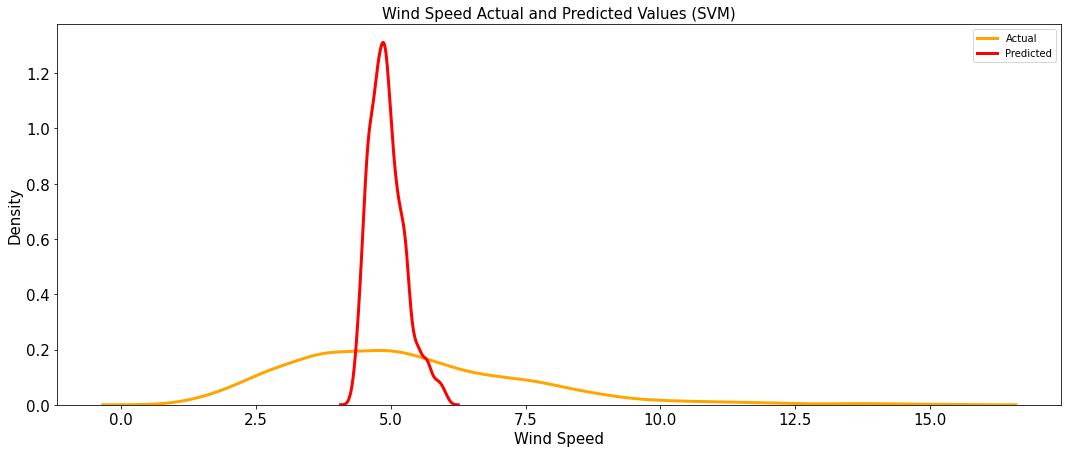

In [81]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = dt["wind speed"], label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_s3, label = "Predicted", linewidth = 3, color = "red")
plt.title("Wind Speed Actual and Predicted Values (SVM)", size = 15)
plt.xlabel("Wind Speed", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.savefig("Wind Speed_Actual_Predict_SVM.png")
plt.show()

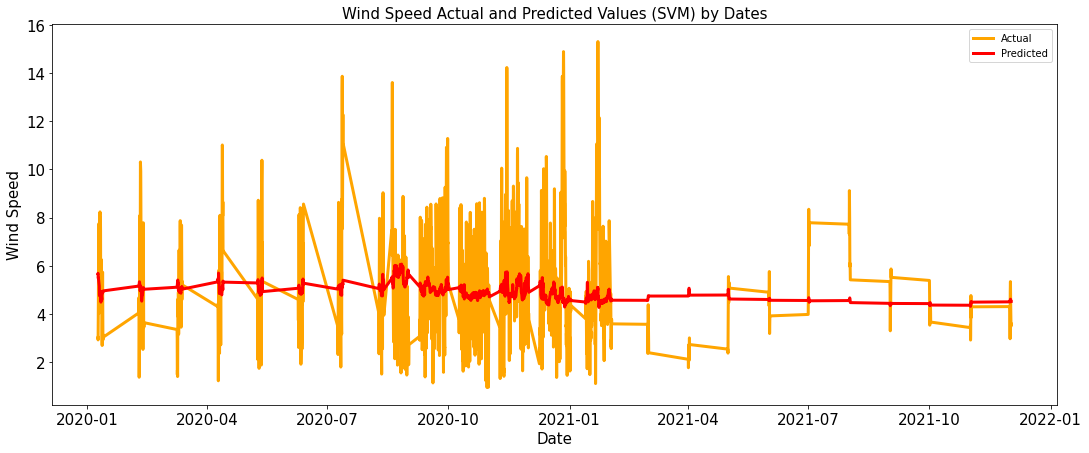

In [82]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = wind_speed_svm.index, y = wind_speed_svm["Actual"], label = "Actual", linewidth = 3, color = "orange")
sns.lineplot(x = wind_speed_svm.index, y = wind_speed_svm["Predicted"], label = "Predicted", linewidth = 3, color = "red")
plt.title("Wind Speed Actual and Predicted Values (SVM) by Dates", size = 15)
plt.xlabel("Date", size = 15)
plt.ylabel("Wind Speed", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.savefig("Wind_Speed_Actual_Predict_Date_SVM.png")
plt.show()

# Wind Speed Prediction with ANN

In [19]:
features = df[["air temperature", "radiance intensity", "surface humidity"]]

target = df["wind speed"]

In [20]:
test = dt[["air temperature", "radiance intensity", "surface humidity"]]

In [21]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

scaled_test = scaler.transform(test)

# Initialising the ANN
model_wind = Sequential()

# Adding the input layer and the first hidden layer
model_wind.add(Dense(32, activation = 'relu', input_dim = 3))

# Adding the second hidden layer
model_wind.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model_wind.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model_wind.add(Dense(units = 1))

model_wind.compile(optimizer = 'adam',loss = 'mean_squared_error')

model_wind.fit(scaled_features, target, batch_size = 10, epochs = 100)

pred_a3 = model_wind.predict(scaled_test)
wind_speed_ann = pd.DataFrame({"Actual": dt["wind speed"],
                             "Predicted": pred_a3.flatten()})
wind_speed_ann[:5]

Epoch 1/100
922/922 [==============================] - 1s 1ms/step - loss: 6.3350
Epoch 2/100
922/922 [==============================] - 1s 1ms/step - loss: 4.8406
Epoch 3/100
922/922 [==============================] - 1s 1ms/step - loss: 4.7992
Epoch 4/100
922/922 [==============================] - 1s 1ms/step - loss: 4.7847
Epoch 5/100
922/922 [==============================] - 2s 2ms/step - loss: 4.7439
Epoch 6/100
922/922 [==============================] - 1s 2ms/step - loss: 4.7094A: 0s - l - ETA: 0s - loss: 4.701
Epoch 7/100
922/922 [==============================] - 2s 2ms/step - loss: 4.6917
Epoch 8/100
922/922 [==============================] - 2s 2ms/step - loss: 4.6782
Epoch 9/100
922/922 [==============================] - 2s 2ms/step - loss: 4.6432A: 1s - loss: 4 - ET
Epoch 10/100
922/922 [==============================] - 1s 1ms/step - loss: 4.6234
Epoch 11/100
922/922 [==============================] - 1s 1ms/step - loss: 4.6103
Epoch 12/100
922/922 [=====================

922/922 [==============================] - 1s 1ms/step - loss: 4.0729
Epoch 99/100
922/922 [==============================] - 1s 1ms/step - loss: 4.0710
Epoch 100/100
922/922 [==============================] - 1s 1ms/step - loss: 4.0798


,Actual,Predicted
Date Time,,
2020-08-18 22:00:00,7.465313,4.963786
2020-08-18 23:00:00,6.717577,4.628913
2020-08-19 00:00:00,6.449039,5.146338
2020-08-19 01:00:00,6.458337,6.215961
2020-08-19 02:00:00,6.447921,6.470207


In [22]:
model_wind.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 2,273
Trainable params: 2,273
Non-trainable params: 0
_________________________________________________________________


**Custom Prediction**

In [207]:
model_wind.predict(scaler.transform([[22.062860, 316.073578, 0.008392]]))

array([[5.2390976]], dtype=float32)

In [208]:
wind_speed_ann.loc["2020-10-19 14:00:00"]

,Actual,Predicted
Date Time,,
2020-10-19 14:00:00,6.123087,4.633687


In [209]:
wind_speed_ann["Error"] = abs(wind_speed_ann["Actual"] - wind_speed_ann["Predicted"])
wind_speed_ann[:3]

,Actual,Predicted,Error
Date Time,,,
2020-08-18 22:00:00,7.465313,5.543421,1.921893
2020-08-18 23:00:00,6.717577,4.654189,2.063388
2020-08-19 00:00:00,6.449039,5.082295,1.366743


In [210]:
wind_speed_ann.to_csv("Wind_Speed_ANN.csv")

**R Squared (Wind Speed ANN)**

In [87]:
r_squared = r2_score(dt["wind speed"], pred_a3)
print("R Squared (Wind Speed SVM) =", r_squared)

R Squared (Wind Speed SVM) = -0.1352157918861332


**Mean Bias Error (Wind Speed ANN)**

In [88]:
MBE = np.mean(dt["wind speed"] - pred_a3.flatten())
print("Mean Bias Error (Wind Speed ANN) =", MBE)

Mean Bias Error (Wind Speed ANN) = 0.3230034955529097


**Mean Abolute Error (Wind Speed ANN)**

In [89]:
MAE = mean_absolute_error(dt["wind speed"], pred_a3)
print("Mean Abolute Error (Wind Speed ANN) =", MAE)

Mean Abolute Error (Wind Speed ANN) = 1.833915707383135


**Root Mean Squared Error (Wind Speed ANN)**

In [90]:
score = MSE(dt["wind speed"], pred_a3)**0.5
print("Root Mean Squared Error (Wind Speed ANN) =", score)

Root Mean Squared Error (Wind Speed ANN) = 2.3624643076613863


**Mean Absolute Percentage Error (Wind Speed ANN)**

In [91]:
mape = mean_absolute_percentage_error(dt["wind speed"], pred_a3)
print("Mean Absolute Percentage Error (Wind Speed ANN) = ", mape)

Mean Absolute Percentage Error (Wind Speed ANN) =  0.406234042318196


**Mean Absolute Bias Error (Wind Speed ANN)**

In [92]:
mabe = np.mean(abs(dt["wind speed"] - pred_a3.flatten()))
print("Mean Absolute Bias Error (Wind Speed ANN) = ", mabe)

Mean Absolute Bias Error (Wind Speed ANN) =  1.833915707383135


**Wind Speed Actual and Predicted Values (ANN)**

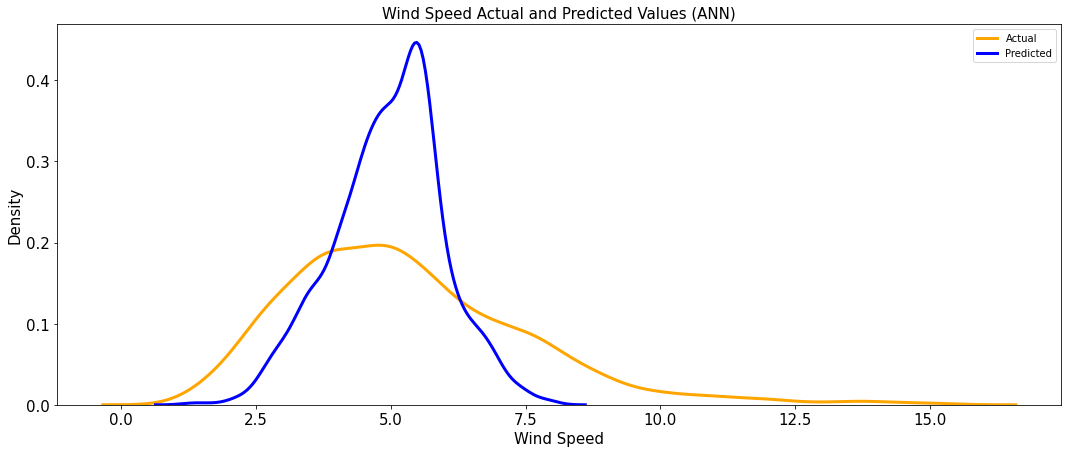

In [93]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = dt["wind speed"], label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a3.flatten(), label = "Predicted", linewidth = 3, color = "blue")
plt.title("Wind Speed Actual and Predicted Values (ANN)", size = 15)
plt.xlabel("Wind Speed", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.savefig("Wind_Speed_Actual_Predict_ANN.png")
plt.show()

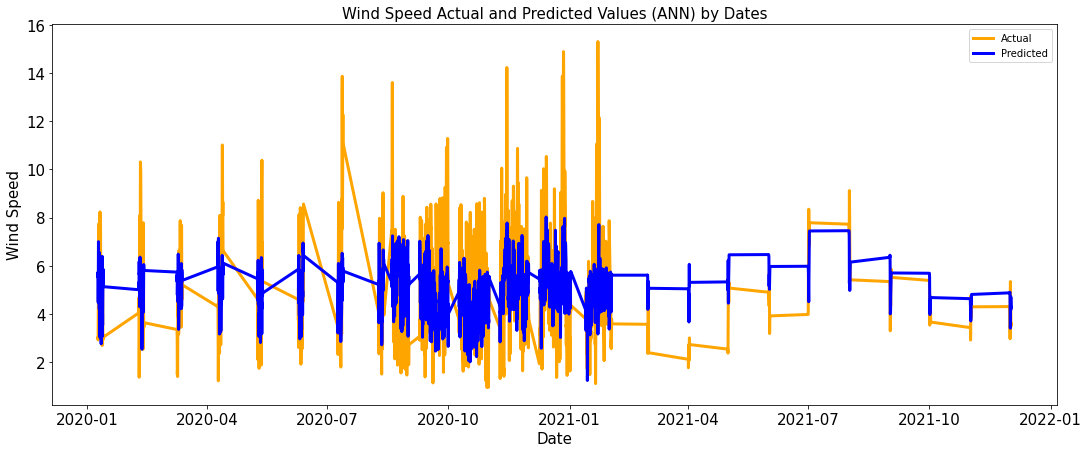

In [94]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = wind_speed_ann.index, y = wind_speed_ann["Actual"], label = "Actual", linewidth = 3, color = "orange")
sns.lineplot(x = wind_speed_ann.index, y = wind_speed_ann["Predicted"], label = "Predicted", linewidth = 3, color = "blue")
plt.title("Wind Speed Actual and Predicted Values (ANN) by Dates", size = 15)
plt.xlabel("Date", size = 15)
plt.ylabel("Wind Speed", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.savefig("Wind_Speed_Actual_Predict_Date_ANN.png")
plt.show()

**Wind Speed Prediction Comparison (ANN & SVM)**

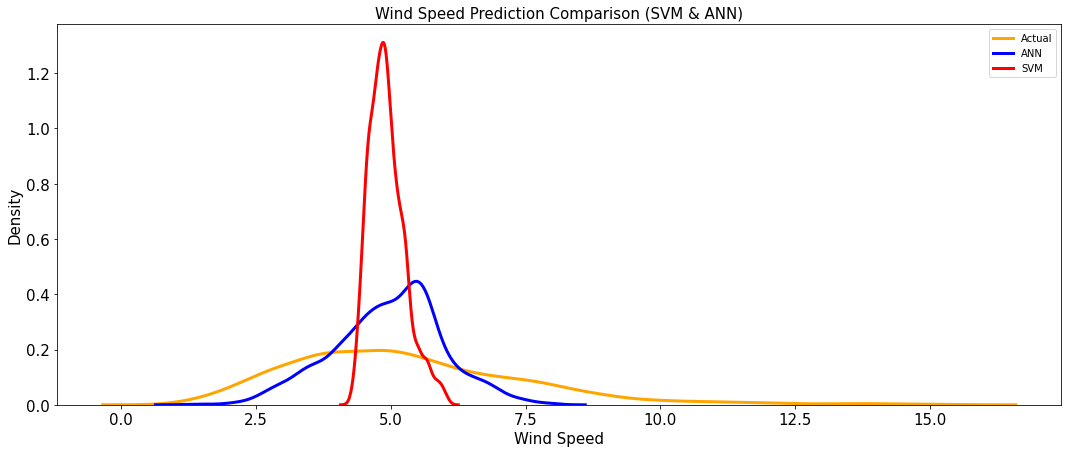

In [95]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = dt["wind speed"], label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a3.flatten(), label = "ANN", linewidth = 3, color = "blue")
sns.kdeplot(pred_s3.flatten(), label = "SVM", linewidth = 3, color = "red")
plt.title("Wind Speed Prediction Comparison (SVM & ANN)", size = 15)
plt.xlabel("Wind Speed", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.savefig("Wind_Speed_Actual_Predict_ANN_SVM.png")
plt.show()

**Wind Speed Prediction Comparison (ANN & SVM) by Date**

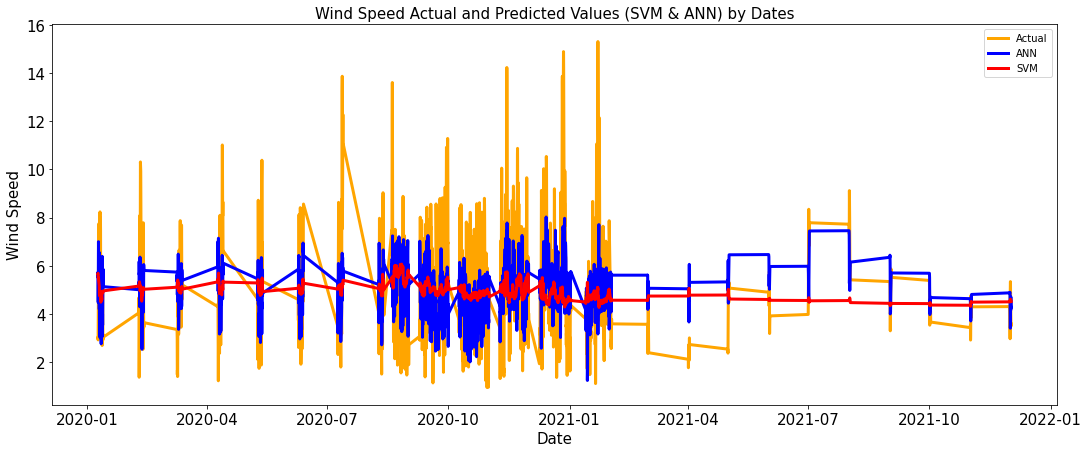

In [96]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = wind_speed_ann.index, y = wind_speed_ann["Actual"], label = "Actual", linewidth = 3, color = "orange")
sns.lineplot(x = wind_speed_ann.index, y = wind_speed_ann["Predicted"], label = "ANN", linewidth = 3, color = "blue")
sns.lineplot(x = wind_speed_ann.index, y = wind_speed_svm["Predicted"], label = "SVM", linewidth = 3, color = "red")
plt.title("Wind Speed Actual and Predicted Values (SVM & ANN) by Dates", size = 15)
plt.xlabel("Date", size = 15)
plt.ylabel("Wind Speed", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.savefig("Wind_Speed_Actual_Predict_ANN_SVM_Date.png")
plt.show()

# Radiance Intensity Prediction with SVM

In [14]:
features = df[["air temperature", "wind speed", "surface humidity"]]

target = df["radiance intensity"]

In [15]:
test = dt[["air temperature", "wind speed", "surface humidity"]]

In [16]:
# Scaling Object
scaler = StandardScaler()

# Values are scaled in range 0 to 1
scaled_features = scaler.fit_transform(features)
scaled_test = scaler.transform(test)


# SVR object
svm = SVR()

# Define kernel parameters
parameters = {"kernel":["linear", "poly"]}

# Instantiate the GridSearchCV object and run the search
searcher_rad = GridSearchCV(svm, parameters)

searcher_rad.fit(scaled_features, target)

# Report the best parameter and the corresponding score
print("Best CV params", searcher_rad.best_params_, "\n")

Best CV params {'kernel': 'linear'} 



In [18]:
dt[50:60]

,air temperature,surface humidity,radiance intensity,wind speed
Date Time,,,,
2020-08-21 00:00:00,18.011835,0.016641,351.927277,2.922812
2020-08-21 01:00:00,17.809931,0.016547,352.289276,3.334471
2020-08-21 02:00:00,17.833307,0.016318,351.760590,3.794709
2020-08-21 03:00:00,19.694422,0.014701,357.143066,3.385183
2020-08-21 04:00:00,21.379236,0.013052,357.457703,2.510981
2020-08-21 05:00:00,22.478266,0.012072,359.339600,2.166762
2020-08-21 06:00:00,23.458643,0.011499,361.830383,2.127140
2020-08-21 07:00:00,24.360651,0.011235,368.933746,2.367452
2020-08-21 08:00:00,25.096949,0.011224,371.170197,2.524823


In [17]:
pred_s4 = searcher_rad.predict(scaled_test)
rad_int_svm = pd.DataFrame({"Actual": dt["radiance intensity"],
                             "Predicted": pred_s4})
rad_int_svm[:5]

,Actual,Predicted
Date Time,,
2020-08-18 22:00:00,317.133606,330.011745
2020-08-18 23:00:00,316.073578,322.241606
2020-08-19 00:00:00,314.934540,317.548021
2020-08-19 01:00:00,313.799072,314.211259
2020-08-19 02:00:00,313.741882,311.628967


**Custom Prediction**

In [19]:
searcher_rad.predict(scaler.transform([[17.809931, 2.367452, 0.013052]]))

array([333.25640642])

In [26]:
rad_int_svm.loc["2021-01-18 09:00:00"]

,Actual,Predicted
Date Time,,
2021-01-18 09:00:00,224.634247,237.355254


In [232]:
rad_int_svm["Error"] = abs(rad_int_svm["Actual"] - rad_int_svm["Predicted"])

In [233]:
rad_int_svm.to_csv("Radiance_Intensity_SVM.csv")

**R Squared (Radiance Intensity SVM)**

In [103]:
r_squared = r2_score(dt["radiance intensity"], pred_s4)
print("R Squared (Radiance Intensity SVM) =", r_squared)

R Squared (Radiance Intensity SVM) = 0.8768899524928879


**Mean Bias Error (Radiance Intensity SVM)**

In [106]:
MBE = np.mean(dt["radiance intensity"] - pred_s4)
print("Mean Bias Error (Radiance Intensity SVM) =", MBE)

Mean Bias Error (Radiance Intensity SVM) = -4.6209915734350435


**Mean Abolute Error (Radiance Intensity SVM)**

In [107]:
MAE = mean_absolute_error(dt["radiance intensity"], pred_s4)
print("Mean Abolute Error (Radiance Intensity SVM) =", MAE)

Mean Abolute Error (Radiance Intensity SVM) = 11.958126961124643


**Root Mean Squared Error (Radiance Intensity SVM)**

In [108]:
score = MSE(dt["radiance intensity"], pred_s4)**0.5
print("Root Mean Squared Error (Radiance Intensity SVM) =", score)

Root Mean Squared Error (Radiance Intensity SVM) = 15.093848313535522


**Mean Absolute Percentage Error (Radiance Intensity SVM)**

In [109]:
mape = mean_absolute_percentage_error(dt["radiance intensity"], pred_s4)
print("Mean Absolute Percentage Error (Radiance Intensity SVM) = ", mape)

Mean Absolute Percentage Error (Radiance Intensity SVM) =  0.05332457729820108


**Mean Absolute Bias Error (Radiance Intensity SVM)**

In [110]:
mabe = np.mean(abs(dt["radiance intensity"] - pred_s4.flatten()))
print("Mean Absolute Bias Error (Radiance Intensity SVM) = ", mabe)

Mean Absolute Bias Error (Radiance Intensity SVM) =  11.958126961124643


**Radiance Intensity Actual vs Predicted Values (SVM)**"

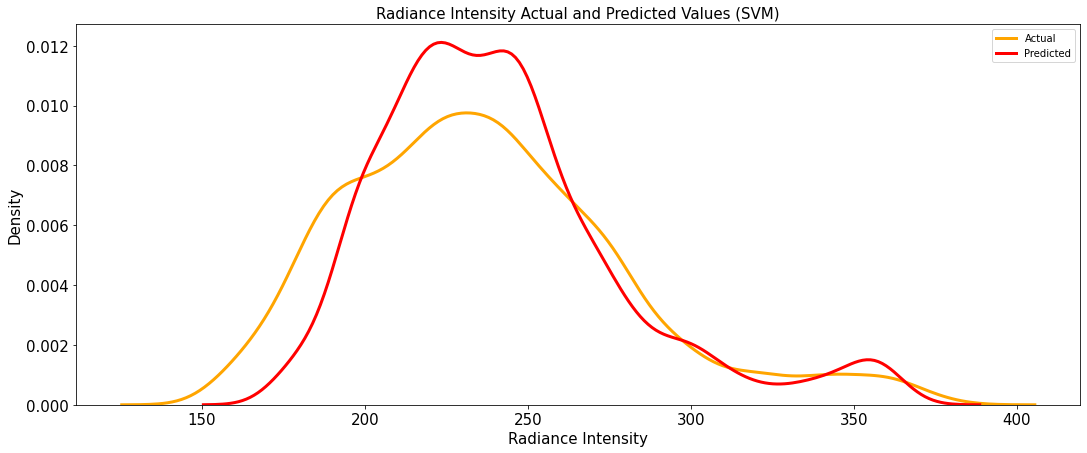

In [115]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = dt["radiance intensity"], label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_s4, label = "Predicted", linewidth = 3, color = "red")
plt.title("Radiance Intensity Actual and Predicted Values (SVM)", size = 15)
plt.xlabel("Radiance Intensity", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.savefig("Radiance_Intensity_Actual_Predict_SVM.png")
plt.show()

**Radiance Intensity Actual vs Predicted Values (SVM) by Date**

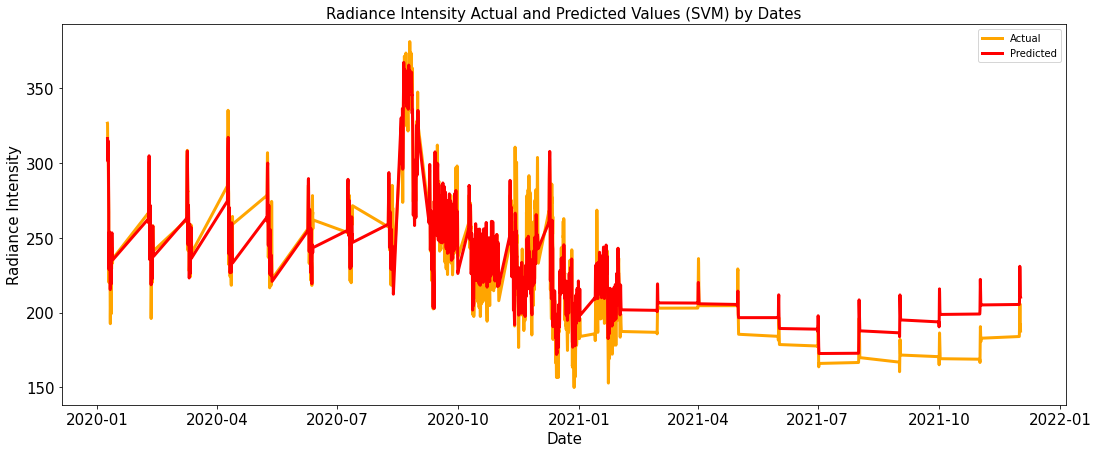

In [116]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = rad_int_svm.index, y = rad_int_svm["Actual"], label = "Actual", linewidth = 3, color = "orange")
sns.lineplot(x = rad_int_svm.index, y = rad_int_svm["Predicted"], label = "Predicted", linewidth = 3, color = "red")
plt.title("Radiance Intensity Actual and Predicted Values (SVM) by Dates", size = 15)
plt.xlabel("Date", size = 15)
plt.ylabel("Radiance Intensity", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.savefig("Radiance_Intensity_Actual_Predict_Date_SVM.png")
plt.show()

# Radiance Intensity Prediction with ANN

In [23]:
features = df[["air temperature", "wind speed", "surface humidity"]]

target = df["radiance intensity"]

In [24]:
test = dt[["air temperature", "wind speed", "surface humidity"]]

In [25]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

scaled_test = scaler.transform(test)

# Initialising the ANN
model_rad = Sequential()

# Adding the input layer and the first hidden layer
model_rad.add(Dense(32, activation = 'relu', input_dim = 3))

# Adding the second hidden layer
model_rad.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model_rad.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model_rad.add(Dense(units = 1))

model_rad.compile(optimizer = 'adam',loss = 'mean_squared_error')

model_rad.fit(scaled_features, target, batch_size = 10, epochs = 100)

pred_a4 = model_rad.predict(scaled_test)
rad_int_ann = pd.DataFrame({"Actual": dt["radiance intensity"],
                             "Predicted": pred_a4.flatten()})
rad_int_ann[:5]

Epoch 1/100
922/922 [==============================] - 1s 1ms/step - loss: 14141.1709
Epoch 2/100
922/922 [==============================] - 1s 1ms/step - loss: 472.0277
Epoch 3/100
922/922 [==============================] - 1s 1ms/step - loss: 313.9370
Epoch 4/100
922/922 [==============================] - 1s 1ms/step - loss: 293.4446
Epoch 5/100
922/922 [==============================] - 1s 1ms/step - loss: 291.6300
Epoch 6/100
922/922 [==============================] - 1s 1ms/step - loss: 289.3741
Epoch 7/100
922/922 [==============================] - 1s 1ms/step - loss: 289.3622
Epoch 8/100
922/922 [==============================] - 1s 1ms/step - loss: 287.3187
Epoch 9/100
922/922 [==============================] - 1s 1ms/step - loss: 287.0760
Epoch 10/100
922/922 [==============================] - 1s 1ms/step - loss: 288.4685A: 0s - 
Epoch 11/100
922/922 [==============================] - 1s 1ms/step - loss: 289.5780
Epoch 12/100
922/922 [==============================] - 1s 1ms/s

922/922 [==============================] - 1s 1ms/step - loss: 192.3580
Epoch 97/100
922/922 [==============================] - 1s 1ms/step - loss: 190.7487
Epoch 98/100
922/922 [==============================] - 1s 1ms/step - loss: 189.7217
Epoch 99/100
922/922 [==============================] - 1s 1ms/step - loss: 191.6616
Epoch 100/100
922/922 [==============================] - 1s 1ms/step - loss: 189.7269


,Actual,Predicted
Date Time,,
2020-08-18 22:00:00,317.133606,326.460938
2020-08-18 23:00:00,316.073578,319.792114
2020-08-19 00:00:00,314.934540,315.691589
2020-08-19 01:00:00,313.799072,313.038086
2020-08-19 02:00:00,313.741882,312.653870


In [26]:
model_rad.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                128       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 2,273
Trainable params: 2,273
Non-trainable params: 0
_________________________________________________________________


**Custom Prediction**

In [30]:
dt[105:115]

,air temperature,surface humidity,radiance intensity,wind speed
Date Time,,,,
2020-08-23 07:00:00,26.288355,0.009827,342.784332,1.861465
2020-08-23 08:00:00,27.279352,0.009538,345.407501,1.912971
2020-08-23 09:00:00,28.083307,0.009361,348.814636,2.234504
2020-08-23 10:00:00,28.605890,0.009313,352.149078,2.697257
2020-08-23 11:00:00,28.831629,0.009475,358.409760,3.273075
2020-08-23 12:00:00,28.709711,0.010009,360.048218,4.000011
2020-08-23 13:00:00,28.201685,0.010769,362.408630,5.257887
2020-08-23 14:00:00,27.140100,0.011913,357.407532,5.952509
2020-08-23 15:00:00,25.517389,0.012992,349.353027,6.264212


In [31]:
model_rad.predict(scaler.transform([[24.112726, 3.273075, 0.009827]]))

array([[333.13443]], dtype=float32)

In [76]:
rad_int_ann.loc["2021-02-09 20:00:00"]

,Actual,Predicted
Date Time,,


In [62]:
dt[:320]

,air temperature,surface humidity,radiance intensity,wind speed
Date Time,,,,
2020-08-18 22:00:00,22.062860,0.010105,317.133606,7.465313
2020-08-18 23:00:00,22.092310,0.009034,316.073578,6.717577
2020-08-19 00:00:00,22.060419,0.008392,314.934540,6.449039
2020-08-19 01:00:00,21.988306,0.007938,313.799072,6.458337
2020-08-19 02:00:00,21.834223,0.007634,313.741882,6.447921
...,...,...,...,...
2020-01-09 01:00:00,15.689386,0.011089,326.279572,3.038117
2020-01-09 02:00:00,15.788721,0.010734,323.741821,2.909919
2020-01-09 03:00:00,16.596552,0.010560,318.241913,3.761524


In [230]:
rad_int_ann["Error"] = abs(rad_int_ann["Actual"] - rad_int_ann["Predicted"])
rad_int_ann[:3]

,Actual,Predicted,Error
Date Time,,,
2020-08-18 22:00:00,317.133606,324.291016,7.157410
2020-08-18 23:00:00,316.073578,317.761505,1.687927
2020-08-19 00:00:00,314.934540,314.244232,0.690308


In [231]:
rad_int_ann.to_csv("Radiance_Intensity_ANN.csv")

**R Squared (Radiance Intensity ANN)**

In [121]:
r_squared = r2_score(dt["radiance intensity"], pred_a4)
print("R Squared (Radiance Intensity ANN) =", r_squared)

R Squared (Radiance Intensity ANN) = 0.9371833754504486


**Mean Bias Error (Radiance Intensity ANN)**

In [128]:
MBE = np.mean(dt["radiance intensity"] - pred_a4.flatten())
print("Mean Bias Error (Radiance Intensity ANN) =", MBE)

Mean Bias Error (Radiance Intensity ANN) = -2.338137946622553


**Mean Abolute Error (Radiance Intensity ANN)**

In [127]:
MAE = mean_absolute_error(dt["radiance intensity"], pred_a4)
print("Mean Abolute Error (Radiance Intensity ANN) =", MAE)

Mean Abolute Error (Radiance Intensity ANN) = 7.983415559636123


**Root Mean Squared Error (Radiance Intensity ANN)**

In [129]:
score = MSE(dt["radiance intensity"], pred_a4)**0.5
print("Root Mean Squared Error (Radiance Intensity ANN) =", score)

Root Mean Squared Error (Radiance Intensity ANN) = 10.781781584088012


**Mean Absolute Percentage Error (Radiance Intensity ANN)**

In [130]:
mape = mean_absolute_percentage_error(dt["radiance intensity"], pred_a4)
print("Mean Absolute Percentage Error (Radiance Intensity ANN) = ", mape)

Mean Absolute Percentage Error (Radiance Intensity ANN) =  0.03456149353826319


**Mean Absolute Bias Error (Radiance Intensity ANN)**

In [131]:
mabe = np.mean(abs(dt["radiance intensity"] - pred_a4.flatten()))
print("Mean Absolute Bias Error (Radiance Intensity ANN) = ", mabe)

Mean Absolute Bias Error (Radiance Intensity ANN) =  7.983415559636123


**Radiance Intensity Actual and Predited (ANN)**

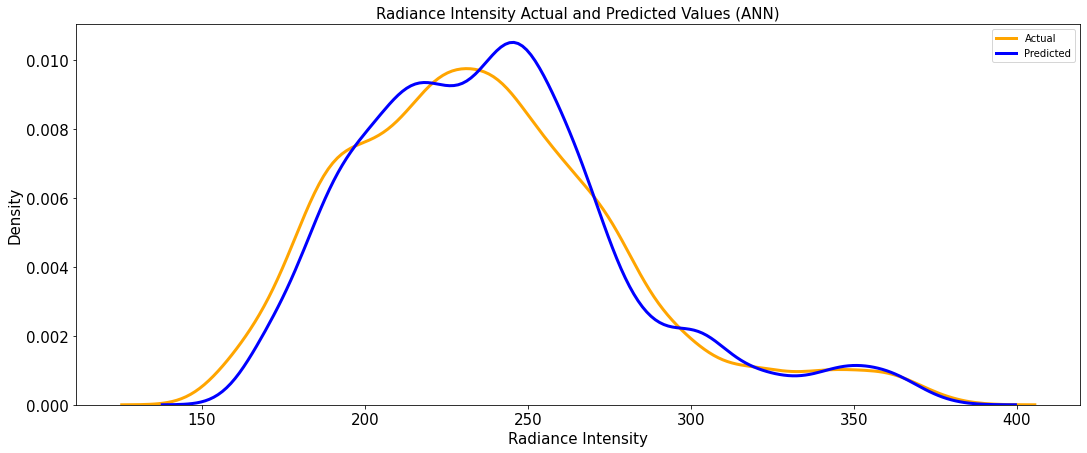

In [132]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = dt["radiance intensity"], label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a4.flatten(), label = "Predicted", linewidth = 3, color = "blue")
plt.title("Radiance Intensity Actual and Predicted Values (ANN)", size = 15)
plt.xlabel("Radiance Intensity", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.savefig("Radiance_Intensity_Actual_Predict_ANN.png")
plt.show()

**Radiance Intensity Actual and Predicted Values (ANN) by Dates**

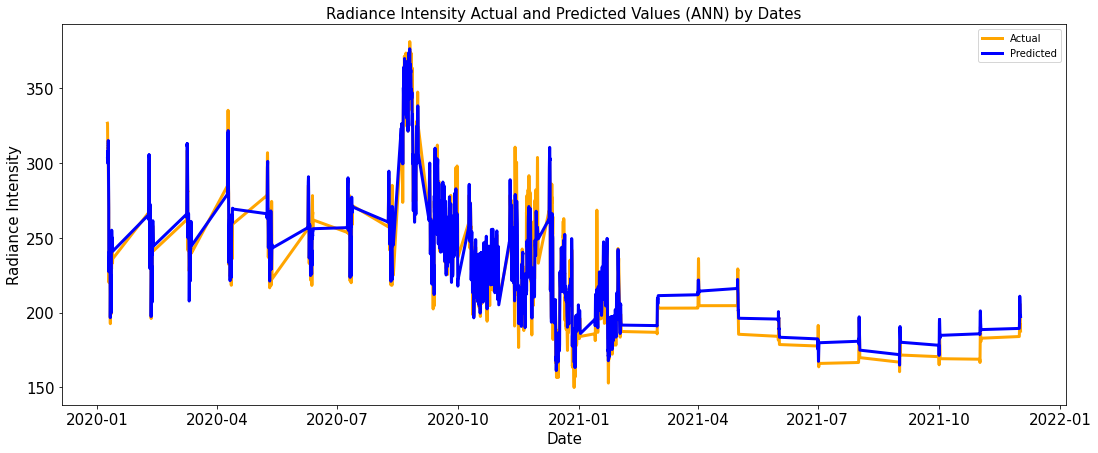

In [133]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = rad_int_ann.index, y = rad_int_ann["Actual"], label = "Actual", linewidth = 3, color = "orange")
sns.lineplot(x = rad_int_ann.index, y = rad_int_ann["Predicted"], label = "Predicted", linewidth = 3, color = "blue")
plt.title("Radiance Intensity Actual and Predicted Values (ANN) by Dates", size = 15)
plt.xlabel("Date", size = 15)
plt.ylabel("Radiance Intensity", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.savefig("Radiance_Intensity_Actual_Predict_Date_ANN.png")
plt.show()

**Radiance Intensity Prediction Comparison (SVM & ANN)**

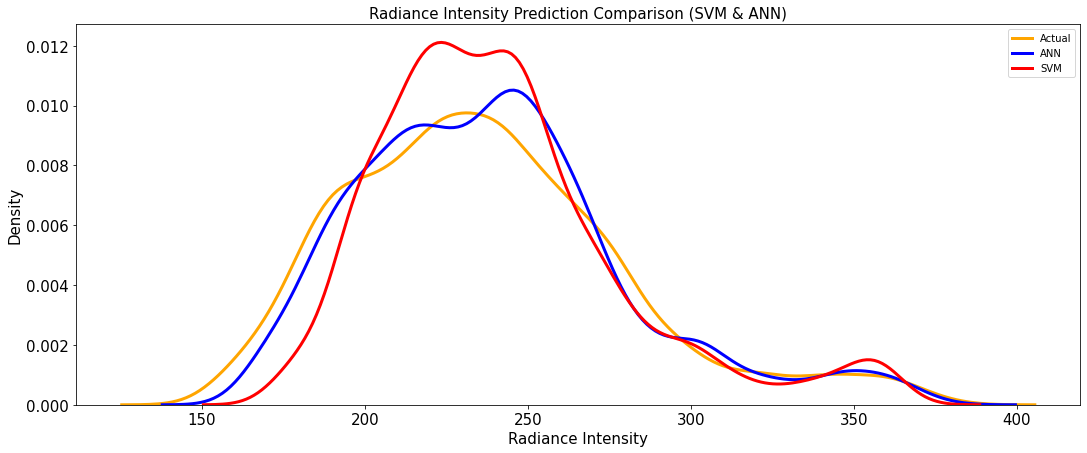

In [135]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = dt["radiance intensity"], label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(pred_a4.flatten(), label = "ANN", linewidth = 3, color = "blue")
sns.kdeplot(pred_s4.flatten(), label = "SVM", linewidth = 3, color = "red")
plt.title("Radiance Intensity Prediction Comparison (SVM & ANN)", size = 15)
plt.xlabel("Radiance Intensity", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.savefig("Radiance_Intensity_Actual_Predict_ANN_SVM.png")
plt.show()

**Radiance Intensity Prediction Comparison (SVM & ANN) by Date**

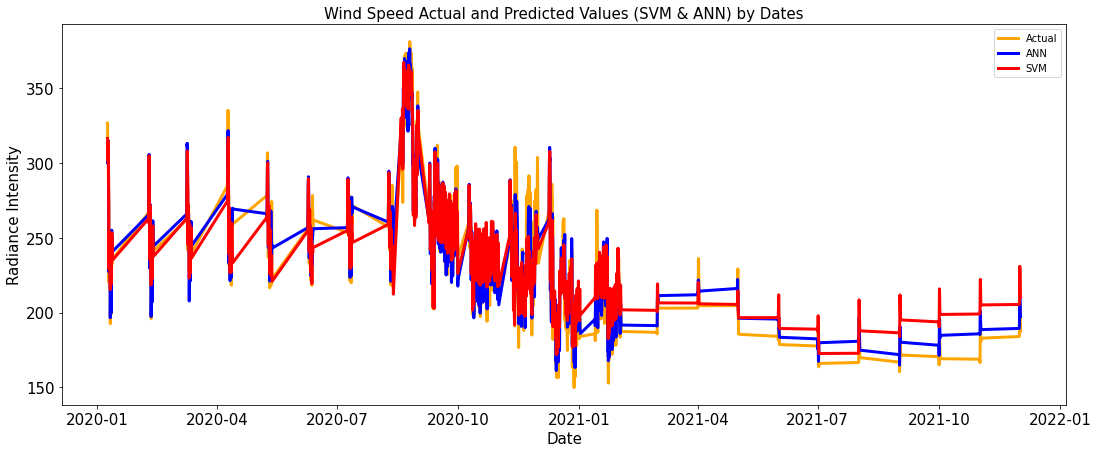

In [136]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = rad_int_ann.index, y = rad_int_ann["Actual"], label = "Actual", linewidth = 3, color = "orange")
sns.lineplot(x = rad_int_ann.index, y = rad_int_ann["Predicted"], label = "ANN", linewidth = 3, color = "blue")
sns.lineplot(x = rad_int_ann.index, y = rad_int_svm["Predicted"], label = "SVM", linewidth = 3, color = "red")
plt.title("Wind Speed Actual and Predicted Values (SVM & ANN) by Dates", size = 15)
plt.xlabel("Date", size = 15)
plt.ylabel("Radiance Intensity", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.savefig("Radiance_Intensity_Speed_Actual_Predict_ANN_SVM_Date.png")
plt.show()

# Regression Graphs of Predicted Radiance Intensity by SVR

**Radiance Intensity Prediction by air temperature**

In [237]:
data = pd.concat([df, dt])
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13176 entries, 2019-08-01 00:00:00 to 2021-01-30 23:00:00
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   air temperature     13176 non-null  float64
 1   surface humidity    13176 non-null  float64
 2   radiance intensity  13176 non-null  float64
 3   wind speed          13176 non-null  float64
dtypes: float64(4)
memory usage: 514.7 KB


In [263]:
feature = data[["air temperature"]]
target = data["radiance intensity"]

In [264]:
svm_a = SVR(kernel = "linear")

svm_a.fit(feature, target)

svm_a_predict = svm_a.predict(feature)

svm_a_act_pred = pd.DataFrame({"Actual": target,
                               "Predicted": svm_a_predict})
svm_a_act_pred[:5]

,Actual,Predicted
Date Time,,
2019-08-01 00:00:00,336.418793,297.535945
2019-08-01 01:00:00,333.328033,296.984486
2019-08-01 02:00:00,330.606750,298.596200
2019-08-01 03:00:00,335.808411,311.673361
2019-08-01 04:00:00,343.027130,322.880902


**Radiance Intensity Predicted Regression Line by Air Temperature**

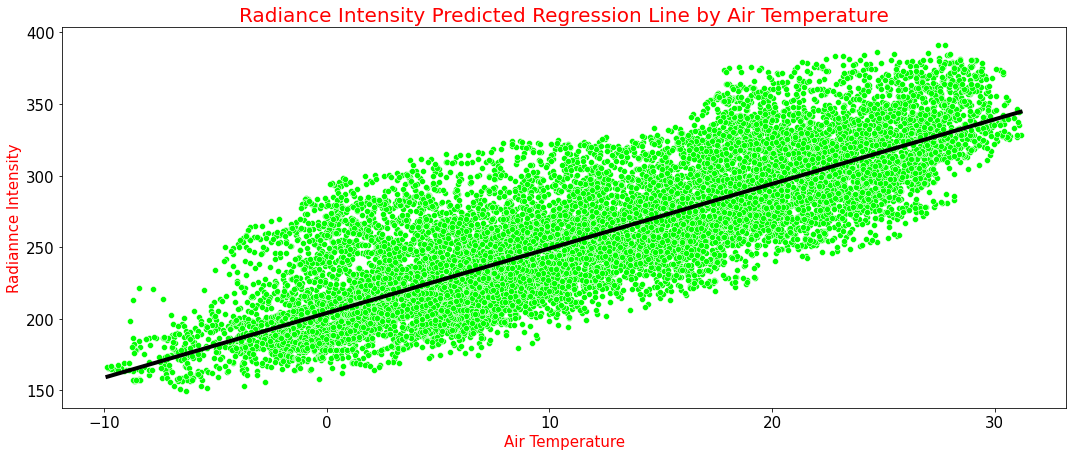

In [265]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "air temperature", y = "radiance intensity", data = data, color = "lime")
sns.lineplot(x = data["air temperature"], y = svm_a_predict, color = "black", linewidth = 4)
plt.title("Radiance Intensity Predicted Regression Line by Air Temperature", color = "red", size = 20)
plt.xlabel("Air Temperature", size = 15, color = "red")
plt.ylabel("Radiannce Intensity", size = 15, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("Rad_Air.png")
plt.show()

**Radiance Intensity Predicted Regression Line by Surface Humidity**

In [266]:
feature = data[["surface humidity"]]
target = data["radiance intensity"]

In [267]:
svm_sh = SVR(kernel = "linear")


svm_sh.fit(feature, target)

svm_sh_predict = svm_sh.predict(feature)

svm_sur_hum_pred = pd.DataFrame({"Actual": target,
                               "Predicted": svm_sh_predict})
svm_sur_hum_pred[:5]

,Actual,Predicted
Date Time,,
2019-08-01 00:00:00,336.418793,261.946790
2019-08-01 01:00:00,333.328033,261.938390
2019-08-01 02:00:00,330.606750,261.926861
2019-08-01 03:00:00,335.808411,261.863556
2019-08-01 04:00:00,343.027130,261.784669


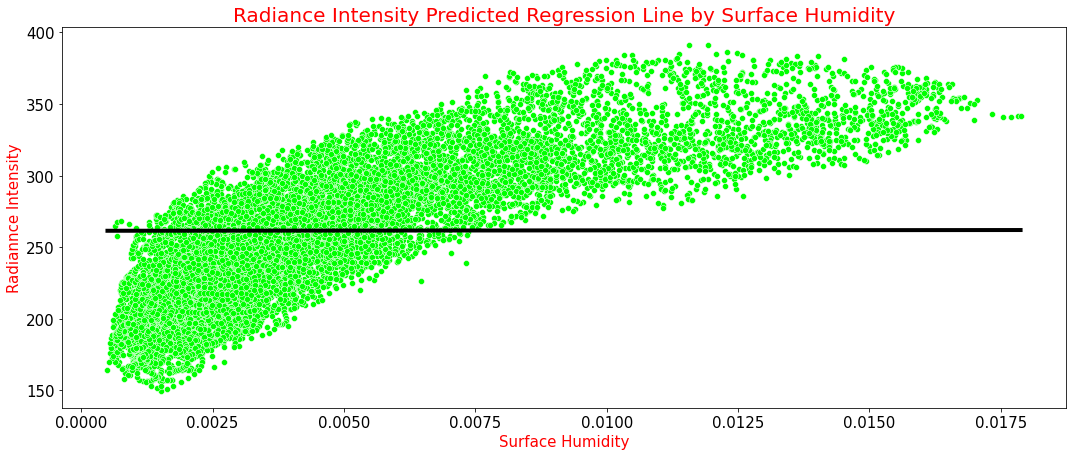

In [274]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "surface humidity", y = "radiance intensity", data = data, color = "lime")
sns.lineplot(x = data["surface humidity"], y = svm_sh_predict, color = "black", linewidth = 4)
plt.title("Radiance Intensity Predicted Regression Line by Surface Humidity", color = "red", size = 20)
plt.xlabel("Surface Humidity", size = 15, color = "red")
plt.ylabel("Radiannce Intensity", size = 15, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("Rad_Surf.png")
plt.show()

**Radiance Intensity Predicted Regression Line by Wind Speed**

In [272]:
feature = data[["wind speed"]]
target = data["radiance intensity"]

In [273]:
svm_ws = SVR(kernel = "linear")


svm_ws.fit(feature, target)

svm_ws_predict = svm_ws.predict(feature)

svm_wind_speed_pred = pd.DataFrame({"Actual": target,
                               "Predicted": svm_ws_predict})
svm_wind_speed_pred[:5]

,Actual,Predicted
Date Time,,
2019-08-01 00:00:00,336.418793,264.249923
2019-08-01 01:00:00,333.328033,264.938758
2019-08-01 02:00:00,330.606750,266.120967
2019-08-01 03:00:00,335.808411,266.082289
2019-08-01 04:00:00,343.027130,265.235243


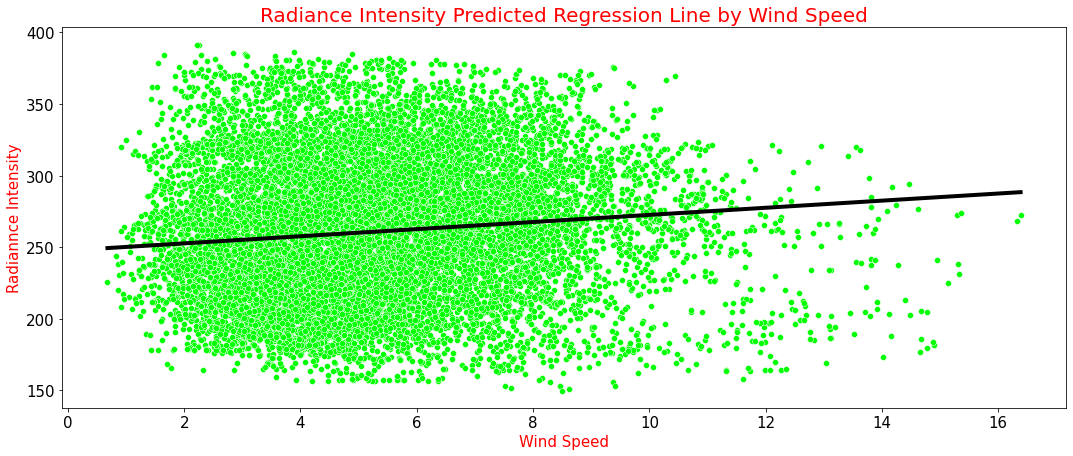

In [276]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "wind speed", y = "radiance intensity", data = data, color = "lime")
sns.lineplot(x = data["wind speed"], y = svm_ws_predict, color = "black", linewidth = 4)
plt.title("Radiance Intensity Predicted Regression Line by Wind Speed", color = "red", size = 20)
plt.xlabel("Wind Speed", size = 15, color = "red")
plt.ylabel("Radiannce Intensity", size = 15, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig("Rad_Wind.png")
plt.show()